# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline
pd.set_option("display.float_format", lambda x: "%.2f" % x) #to display values upto 2 decimal places

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read Dataset (csv) file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIMLCourse/Python_Foundations/Project_1/foodhub_order.csv')

In [5]:
# Copying data to another dataframe varibale to avoid any changes in original data in further evaluations
df = data.copy()

In [6]:
# View the first 5 rows
data.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
# Checking shape of the dataset
data.shape

(1898, 9)

#### Observations:


*  The dataset has 1898 rows and 9 columns
*  Unique Ids for order and customer is under *`order_id`* & *`customer_id`* columns
*  The *`restaurant_name`* column shows the name of the restaurant
*  The *`cuisine_type`* column shows the ordered type of cuisine by customer
*  The *`cost_of_the_order`* as name suggest shows total cost of order
*  The *`day_of_the_week`* column indicates either it's Weekend or Weekday
*  The *`rating`* column displays the rating given by customer
*  The time for food preparation and order delivery is indicated by columns *`food_preparation_time`* & *`delivery_time`* resp.






### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
# Checking the data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   It can be seen there are 4 object type and 5 numerical column
*   Ouf of 4 numerical columns 4 are of integer type and 1 is float type
*   All the columns have 1898 entries, which can be inferred as there is no null value in any column









### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
# Check missing values in dataset
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:


*   We can see that there is no null/missing value in any column
*   As there are no missing values we need not to treat any.





### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
# Check statistical summary of the numerical data, using transpose for better visuals
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:

* The average time for preparing the food is 27.37 min. It takes minimum 20 mins to maximum 35 minutes once the order is placed


#### Other Observations
*   Cost of order varies from appx 4 to 35. The average cost of order is 16.50.
*   The mean delivery time is 24.16 min with range of minimun 15 to maximun 33 minutes. The mean and median values are very close.




### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# Check not rated orders with value rating value 'Not Given'
df[df['rating'] == 'Not given']['rating'].count()

736

#### Observations:

*   As we can see around 736 orders are not rated. Which is about 39% of total orders.






### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Explore Numerical Variable


#### **Observations on Cost of the Orders**

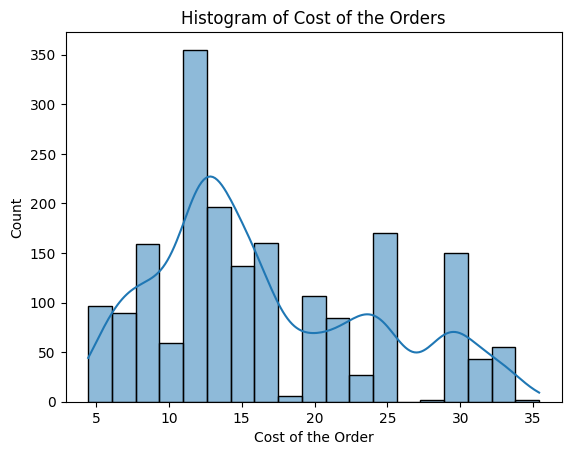

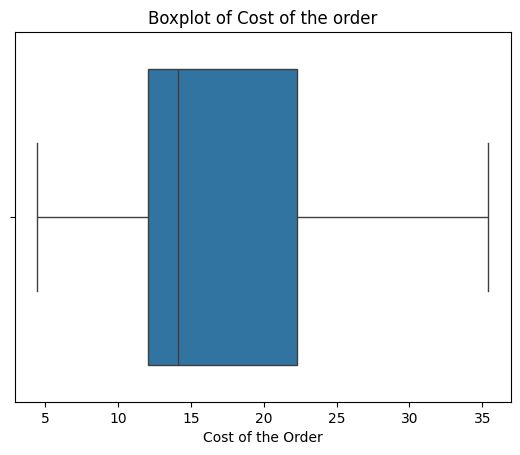

In [12]:
# Plot histgram and boxplot for cost of the orders to data disrtibution
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.title('Histogram of Cost of the Orders')
plt.xlabel('Cost of the Order')
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.title('Boxplot of Cost of the order')
plt.xlabel('Cost of the Order')
plt.show()

#### Observations

*   The disrtibution seems to be slightly right skewed
*   There are no outliers present in data
*   The median value is slighly less than 15, shows more than 50% orders are less tha 15 dollar
*   75% orders are less than  23 dollars
*   The middle 50% of the orders are between medium range of cost from ~12 to ~22












#### **Observations on Food Preperation Time**

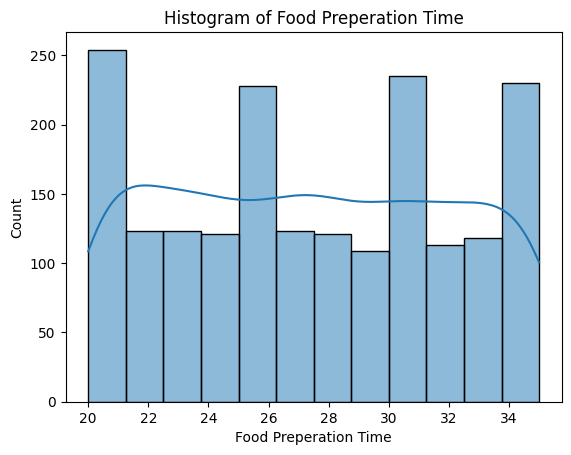

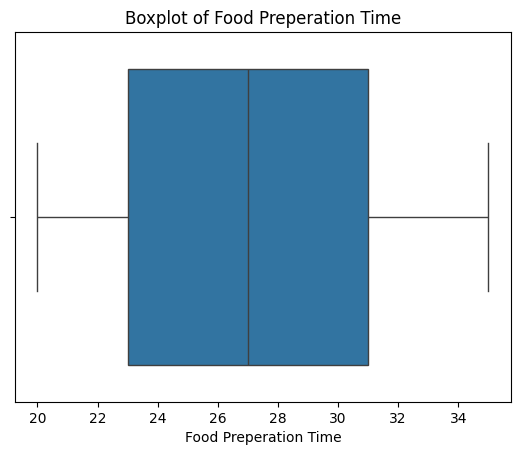

In [13]:
# Plot histgram and boxplot for food preparation time to data disrtibution
sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.title('Histogram of Food Preperation Time')
plt.xlabel('Food Preperation Time')
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.title('Boxplot of Food Preperation Time')
plt.xlabel('Food Preperation Time')
plt.show()

#### Observations
*   As it can be seen from histogram, there are peaks at certain intervals, specifically at 20, 26, 30, and 34 minutes, where the count of orders is noticeably higher than in other intervals.
*   The box appears fairly symmetrical, indicating that the data is approximately similarly distributed around the median.
*   50% of the dishes are made between 23 to 31 mins
*   There are no outliers seen in the boxoplot



#### **Observations on Food Delivery Time**

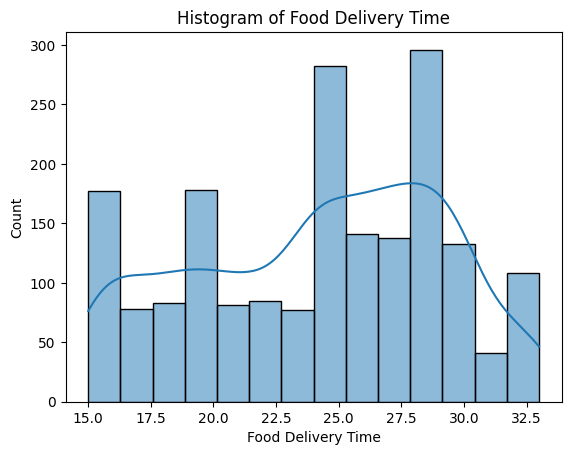

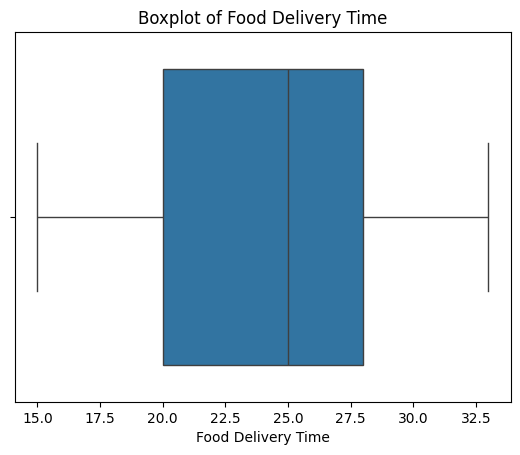

In [14]:
# Plot histogram and boxplot for delivery time to observe distribution
sns.histplot(data=df, x='delivery_time', kde=True)
plt.title('Histogram of Food Delivery Time')
plt.xlabel('Food Delivery Time')
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.title('Boxplot of Food Delivery Time')
plt.xlabel('Food Delivery Time')
plt.show()

#### Observations:

*   As it can be seen from histogram and boxplot the data is slighly left skewed.
*   Most of the deliveries taking more than 20 mins to deliver.
*   Appx. 50% of the deliveries are done within 20 to 28 min
*   There are no outliers seen in the boxoplot





#### **Observation on Order Id**

In [15]:
# Check unique order id
print('The number of unique order are', df.order_id.nunique())


The number of unique order are 1898


#### **Observation on Customer Id**

In [16]:
# Check unique customer id
print('The number of unique customer are', df.customer_id.nunique())

The number of unique customer are 1200


### Explore Categorial Varibles

#### **Observation on Restaurant Names**

In [17]:
# Check unique Restaurant names
print('The number of unique restaurants are', df.restaurant_name.nunique())

The number of unique restaurants are 178


#### **Observations on Cuisine Type**

In [18]:
# Check unique Cuisine Type
print('The number of unique cuisine types are', df.cuisine_type.nunique())

The number of unique cuisine types are 14


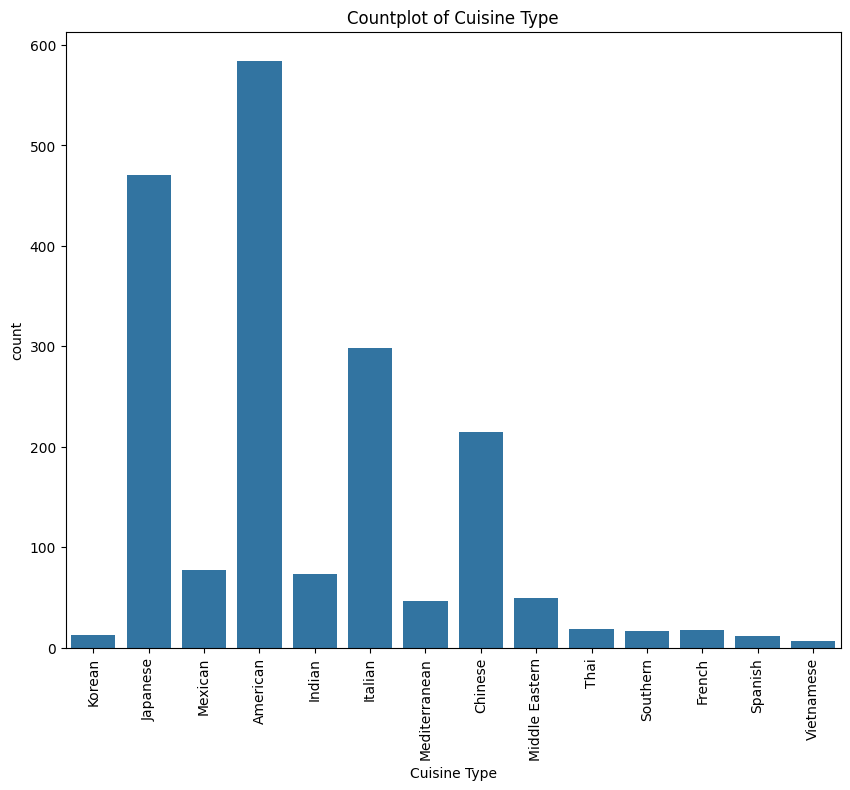

In [19]:
# Create countplot for Cuisine Type
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='cuisine_type')
plt.title('Countplot of Cuisine Type')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=90)
plt.show()

#### Observations
*   Out of 14 cusinte type, **American** seems to mostly ordered cuisine, followed by Japanese, Italian and Chinese
*   **Vietnamese** is least ordered cuisine among all followed by Spanish & Korean



In [20]:
# Check number of order for each cuisine for more clarity
df.groupby('cuisine_type')['order_id'].nunique().sort_values(ascending=False)
# or
# df.cuisine_type.value_counts(normalize=True)

,order_id
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


In [21]:
# Check % of top 4 cuisine types out of overall orders
df.cuisine_type.value_counts(normalize=True).sort_values(ascending=False).head()

,proportion
cuisine_type,
American,0.31
Japanese,0.25
Italian,0.16
Chinese,0.11
Mexican,0.04


In [22]:
# Check sum of % of top 4 cuisine types out of overall orders
df.cuisine_type.value_counts(normalize=True).sort_values(ascending=False).head(4).sum()

0.8256059009483667

#### Observations
*   **Top 4 popular cuisine** types (American, Japenese, Italian, Chinese) contributes to around **82% of overall orders**

#### **Observation on Day of the Week**

In [23]:
# Check number of unique values in day of the week
df['day_of_the_week'].nunique()

2

In [24]:
# Check unique value of day of the week
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

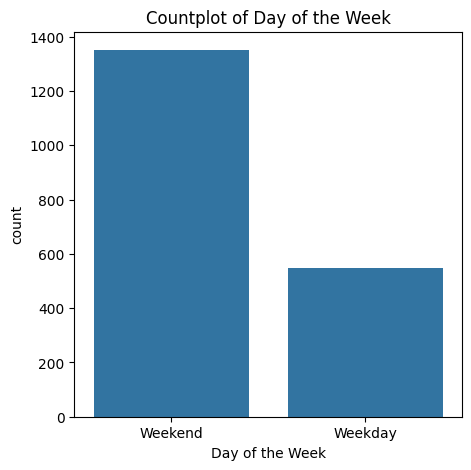

In [25]:
# Create countplot for day of the week
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='day_of_the_week')
plt.title('Countplot of Day of the Week')
plt.xlabel('Day of the Week')
plt.show()

In [26]:
df.day_of_the_week.value_counts(normalize=True)

,proportion
day_of_the_week,
Weekend,0.71
Weekday,0.29


#### Observations

*   Number of orders are **more** on **weekends** than weekdays
*   Around **71%** orders are on Weekends






### Observations on Ratings


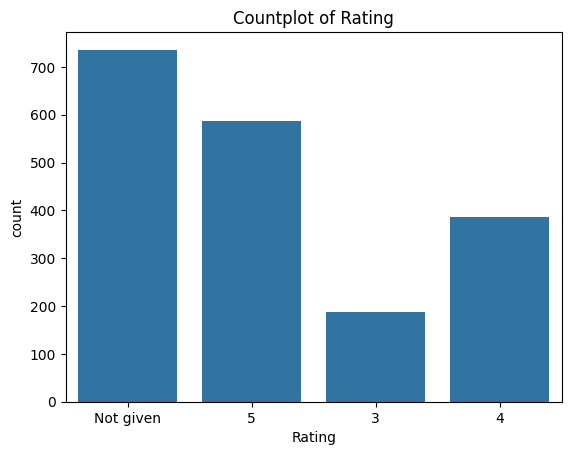

In [27]:
# Check rating counts
sns.countplot(df, x='rating')
plt.title('Countplot of Rating')
plt.xlabel('Rating')
plt.show()

In [28]:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [29]:
df['rating'].value_counts(normalize=True)

,proportion
rating,
Not given,0.39
5,0.31
4,0.20
3,0.10


#### Observations:

*   Total 736 orders are not rated.
*   Number of top rated orders are 588, which is around 31% total orders, followed by 4 and 3 which contributes remaining 30%



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [30]:
# Check top 5 restaurants in terms of number of orders

In [31]:
df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head(5)

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
*  As it can be seen, *Shake Shack* got the maximum orders of 219 among all, followed by *The Meatball Shop (132), Blue Ribbon Sushi (119), Blue Ribbon Fried Chicken (96), Parm (68)*.



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [32]:
# Check most popular cuisine on weekends
df.groupby('day_of_the_week')['cuisine_type'].value_counts().sort_values(ascending=False).head(2)
# OR
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().index[0]

'American'

#### Observations:
*   As it can be observed, **American** cuisine is most **popular on weekends**



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [33]:
# Check number of the orders cost more than 20 dollars
order_above20 = df[df['cost_of_the_order']>20].order_id.count()

# Check total number of orders overall
total_Orders = df.order_id.count()

# Calculate percentage of the order cost more than 20
percent_above20 = (order_above20/total_Orders)*100
print(f'{percent_above20:.2f}% of orders cost more than 20 dollars')

29.24% of orders cost more than 20 dollars


#### Observations:
*   **29.24%** of orders cost above 20 dollars




### **Question 10**: What is the mean order delivery time? [1 mark]

In [34]:
# Check mean order delivery time
df['delivery_time'].mean()

24.161749209694417

#### Observations:
*   The mean order delivery time is **24.16 mins**



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [35]:
# Check top 3 customers with number of orders
top_customers = df['customer_id'].value_counts().reset_index()
top_customers.columns = ['customer_id', 'order_count']
top_customers.head(3)

,customer_id,order_count
0,52832,13
1,47440,10
2,83287,9


#### Observations

*   As it is displayes, **Customer Id - 52832** is top customer with **13 orders**
*   Followed by **Customer Id - 47440** with **10** and **Customer Id - 83287** with **9 orders**.




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [36]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### Day of the week and Delivery time

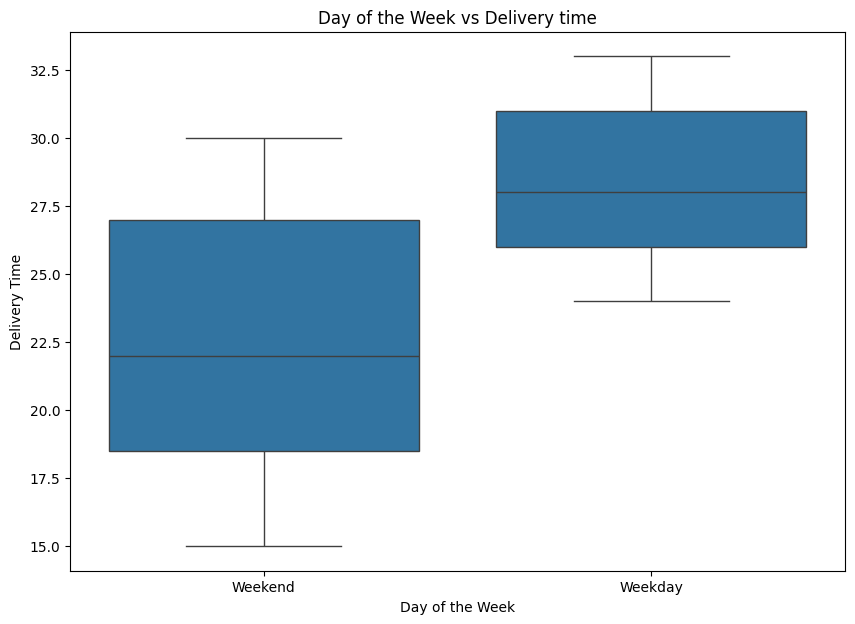

In [37]:
# Check relationship between day of the week and delivery time
plt.figure(figsize=(10,7))
sns.boxplot(df, x='day_of_the_week', y='delivery_time');
plt.title('Day of the Week vs Delivery time')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show()

#### Observations:
*   The median delivery time on weekend is lower than on weekdays, indicating delivery takes longer on weekdays
*   The whiskers indiating the delivery time on weekend is as low as around 15min and as high as 30min. 50% of the deliveries are below 22 mins.
*   On weekdays the range is narrower suggest more cosistent time in delivery. ranging from appx. 24 to 33 mins. 75% delivery took 23 to 31 mins.



### Cuisine and Food Preperation Time

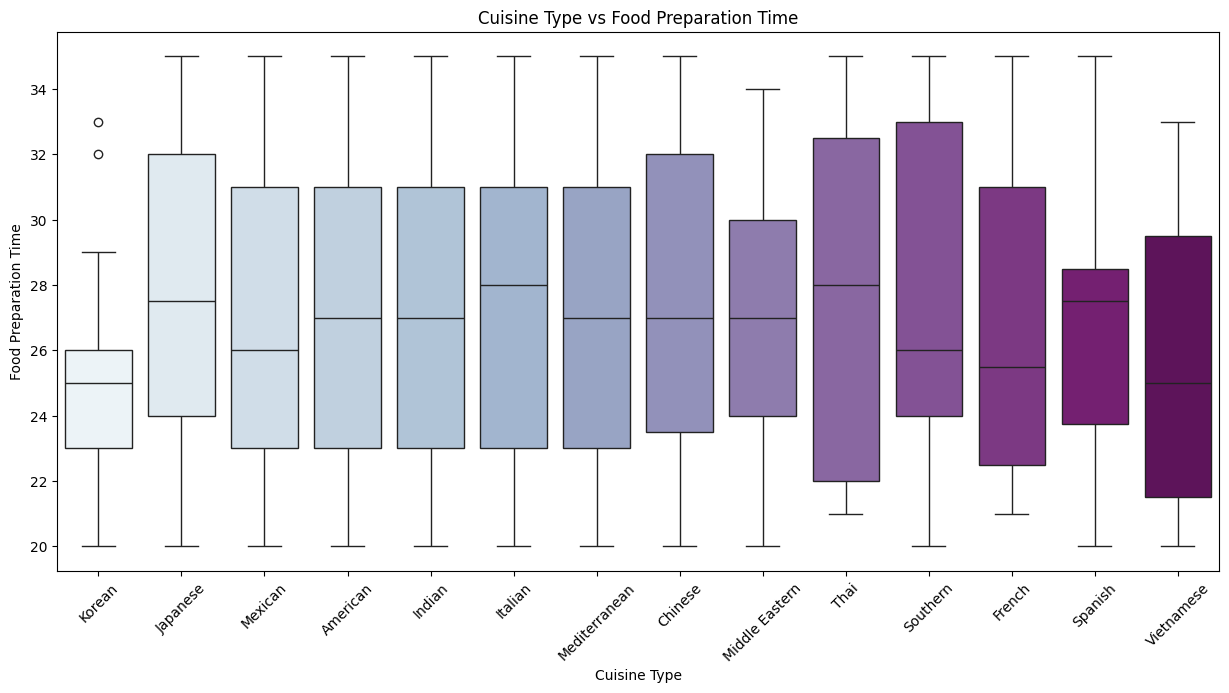

In [38]:
# Observe cuisine and food prepation time based on boxplot
plt.figure(figsize=(15,7))
sns.boxplot(df, x='cuisine_type', y='food_preparation_time', hue='cuisine_type', palette='BuPu')
plt.title('Cuisine Type vs Food Preparation Time')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.xticks(rotation=45)
plt.show()

#### Observations:
*   Korean cuisine shows lowest median and shortest preparation time. however couple of outliers with higher preparation times can be seen.
*   Italian & Thai has highest median in prepation time. Thai cuisine has wide range of preparation times shows greater variability
*   Spanish cuisine also shows high median but low variabiliy in prepartion time.

*  American, Mexican, Japanese,  Indian, Italian, Mediterranean, French etc cuisines have a similar range in preparation times. Medians are around 27 to 28 min shows 50% of the dishes will take around 27 min to prepare




In [39]:
# check food preparation mean and median time based on cusine type
#df.groupby('cuisine_type')['food_preparation_time'].median().sort_values(ascending=False)
#df.groupby('cuisine_type')['food_preparation_time'].mean().sort_values(ascending=False)

### Cuisine and Cost of Order

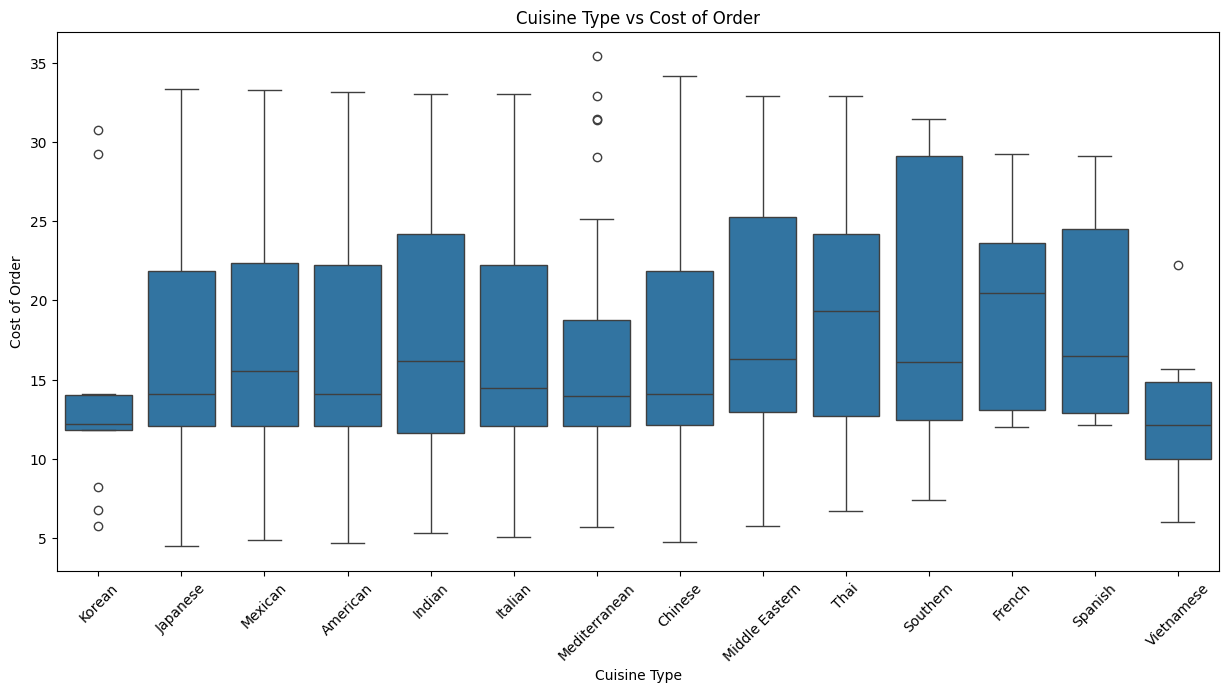

In [40]:
# Observe cuisine and cost of order using boxplot
plt.figure(figsize=(15, 7))
sns.boxplot(df, x='cuisine_type', y='cost_of_the_order')
plt.title('Cuisine Type vs Cost of Order')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of Order')
plt.xticks(rotation=45)
plt.show()

#### Observations:
*   Korean and Vietnamese have lower median and narrow IQR shows, orders from these cuisine are cheaper compare to others.
*   Although there are some outliers in korean on lower side indicating few orders of lower costs. Couple of outliers on upper side on both cuisines shows some high cost orders
*    French and thai orders have highest median cost indcating expensive cusine type
*   Chinese has big range compare to others considering the whiskers. But 50% of the dishes falls between cost of appx 12 to 22 dollars
*   Southern type has wider middle range of costs. Might indicating wider variety of dishesh. 50% ranges above 15 to 30 dollar
*   50% most of the cuisine type's costs ranges from 12 to 23 dollar
*   French and Spanish cuisine start above $12 apprx. French has highest median cost indicates more expensive cuisine type




In [41]:
#Check median and mean for more accuracy in observations
# df.groupby('cuisine_type')['cost_of_the_order'].median().sort_values(ascending=False)
# df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=False)

### Correlation between different variables

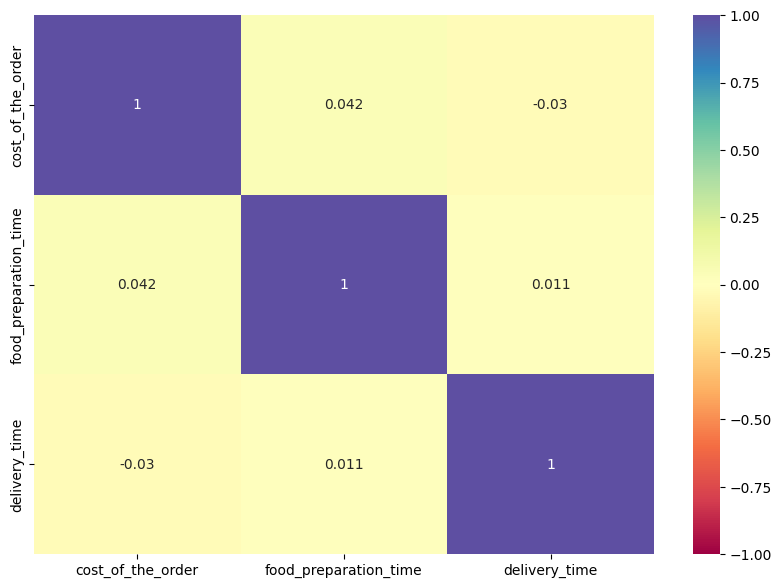

In [42]:
# Check correlation using heatmap
imp_num_col = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(10, 7))
sns.heatmap(df[imp_num_col].corr(),annot=True, vmin=-1, vmax=1, cmap='Spectral')
plt.show()

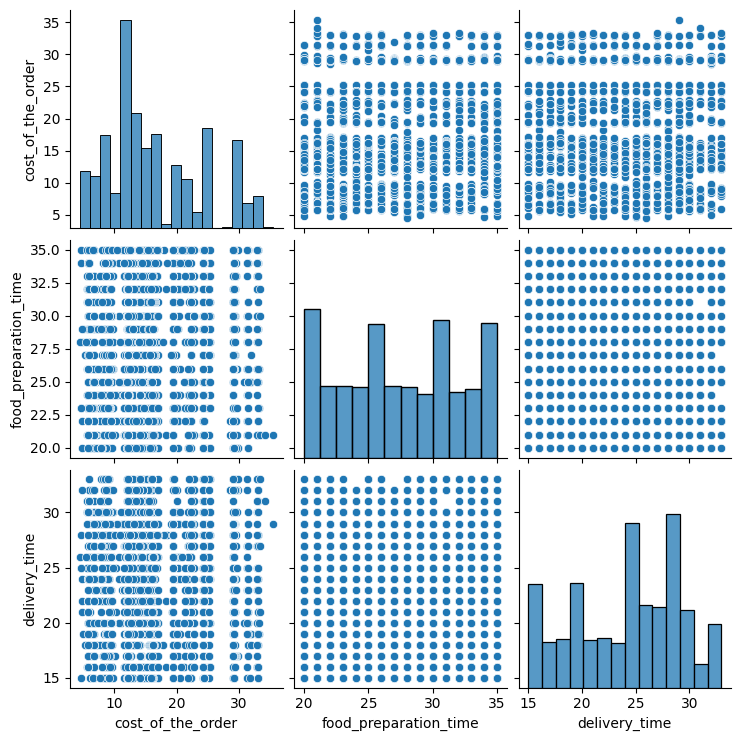

In [43]:
# Check relation using pairplot
sns.pairplot(df[imp_num_col]);

#### Observation:
*  As it can be observed from both the maps there no strong relationship between cost of order, food preparation time and delivery time




### Rating and Delivery time

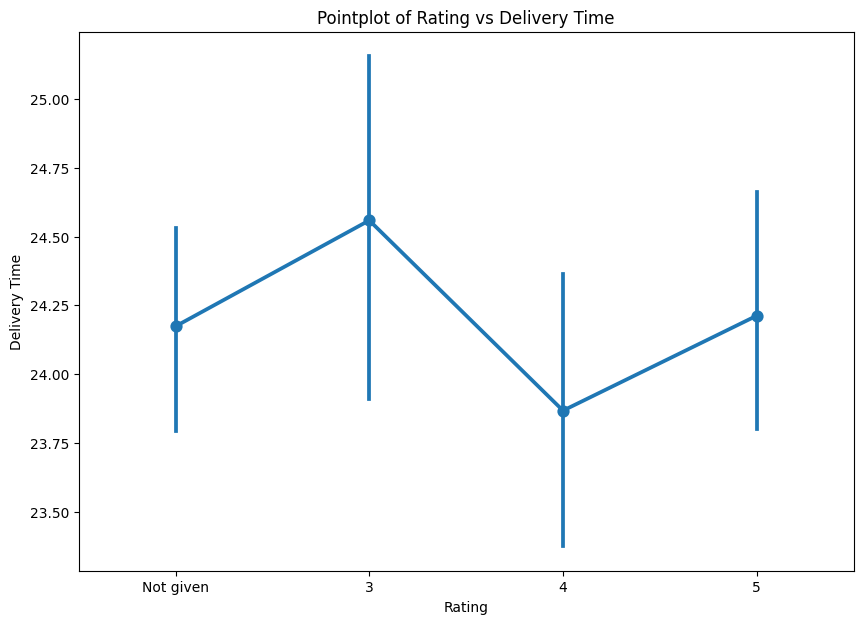

In [44]:
# Observe relationship between rating and delivery time
plt.figure(figsize=(10, 7))
sns.pointplot(df, x='rating', y='delivery_time',order=['Not given','3','4','5']);
plt.title('Pointplot of Rating vs Delivery Time')
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.show()

#### Observations:

*   The delivery time varies accross different ratings. It is generally fluctuating without any clear(updward or downward) trend. Indicating delivery time does not have a straighforward linear relationship with rating
*   For ratings not given mean delivery time is around 24 and comparively small errorbar indicating consistent delivery times
*   For rating 3 The delivery time increases slightly and peaks at this rating, with a noticeable error bar suggesting higher variability in delivery times.
*   There is a drop in delivery time for a rating 4, suggesting that deliveries are slighly quicker. The error bar relatively smaller than ratings 3 indicating more consistency
*   For rating 5 the delivery time increases again but not as much as 3,with an error bar showing some variability.
*   **As per the observation the delivery times do not strictly correlate with ratings, butwith some ratings (like 3) showing longer and more variable delivery times compared to others (like 4)**.





### Ratings and Food preparation time

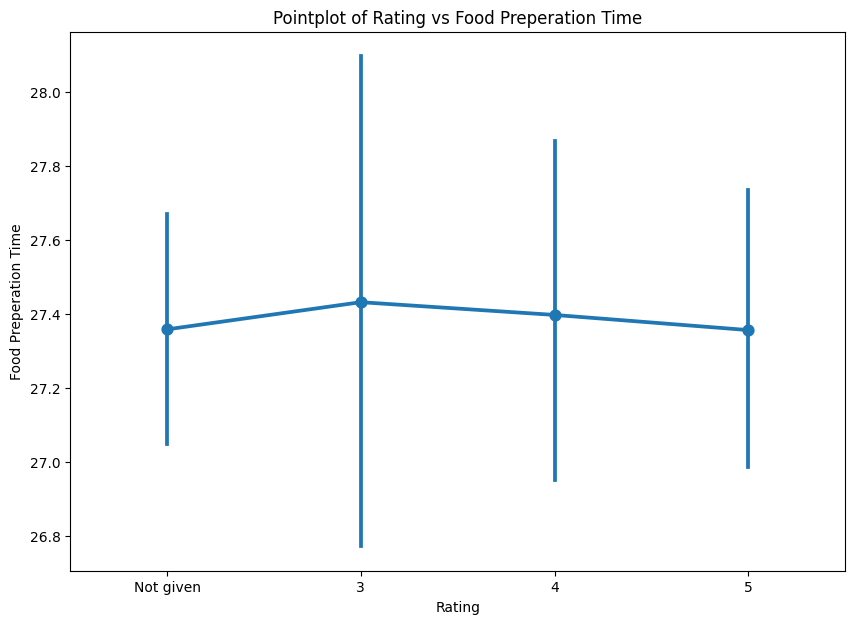

In [45]:
# Check rating and food prepation time by using pointplot
plt.figure(figsize=(10, 7))
sns.pointplot(df, x='rating', y='food_preparation_time', order=['Not given','3','4','5']);
plt.title('Pointplot of Rating vs Food Preperation Time')
plt.xlabel('Rating')
plt.ylabel('Food Preperation Time')
plt.show()


#### Observations

*  The food preparation time remains relatively stable across different ratings, with slight variations. There very slighly decreasing trend observed between rating and prepation time.
*  For 'Not given' the food_preparation_time is around 27.4, with a moderate error bar indicating some variability in preparation times.
*  The food preparation time is slight higher for rating 3 with the largest error bar suggests high variability in times for this rating level
*  for rating 4 and 5 food preparation time slightly decreases compared to 3 with rating 5 showing lowest mean food preparation time. errorbars are comparively smaller than 3 for both indicates less fluctuation than rating 3
*  **To summarize food prepation time is fairly consistent with rating, if we consider minor decreasing trend it can be said that ratings are quite better for lesser time. But as the data do not vary considerably it is hard to conclude**


### Ratings and Cost of the order

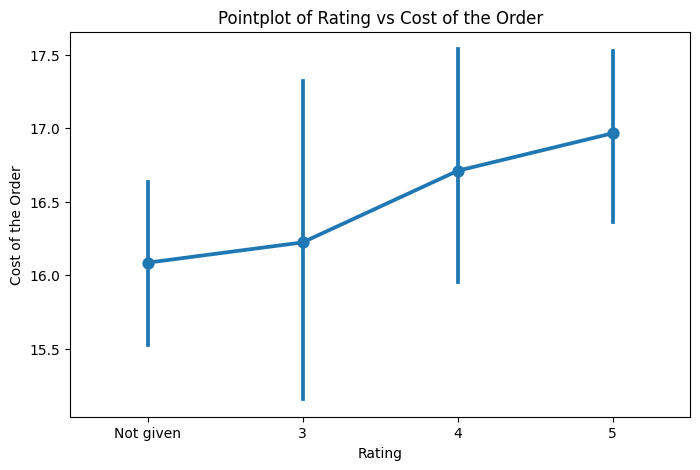

In [46]:
# Check rating and Cost of the order by using pointplot
plt.figure(figsize=(8, 5))
sns.pointplot(df, x='rating', y='cost_of_the_order', order=['Not given','3','4','5']);
plt.title('Pointplot of Rating vs Cost of the Order')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
plt.show()

#### Observations

*  As per the trend the cost of the order is slightly increasing as the rating increases suggesting positive correlation between higher ratings and higher costs. Mean cost for rating 5 is around 17
*  For 'Not given' the cost of the order is around 16 with moderate errorbar
*  For rating 3 the cost shows slight increase in trend witb wide error bar indicating significant variability in the cost.
*  For rating 4 the cost of the order has further increased with moderate error bar suggests orders with 4 rating tend to have high cors and moderate level of variability
*  For the rating 5 cost of the order is highest with continuing the upward trend. The error bar is small compare to 4 indicates less variability. It can be said with trend that high rated orders are more expensive
*  **Overall as the rating increases the cost of the order tends to increase as well. Higher ratings are associated with more expensive order. But as the cost of order is not varying considerably (ranges from 16 to 17) the conclusion cannot be firm**.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [47]:
# Create new dataframe copy with rastaurants provided with ratings
df_rating_given = df[df['rating'] != 'Not given'].copy()

# Convert rating column into int for further evalution
df_rating_given['rating'] = df_rating_given['rating'].astype('int')

# Check rating count and sort with descending order
df_rating_count = df_rating_given.groupby('restaurant_name')['rating'].count().sort_values(ascending=False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [48]:
# Find restaurants with rating count more than 50
restaurants = df_rating_count[df_rating_count.rating > 50]['restaurant_name']

# Find all entries of restaurants found in rating count more than 50 and save as new data frame
df_rated_50plus = df_rating_given[df_rating_given['restaurant_name'].isin(restaurants)].copy()

# Group by restaurants names and find out mean rating for each restaurant
df_avg_4 = df_rated_50plus.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()
df_avg_4.head()

# Check restaurants with mean rating greater than 4
df_avg_4[df_avg_4['rating'] > 4].sort_values(by='rating', ascending=False)

,restaurant_name,rating
0,The Meatball Shop,4.51
1,Blue Ribbon Fried Chicken,4.33
2,Shake Shack,4.28
3,Blue Ribbon Sushi,4.22


#### Observations:

*   As shown in table there are below 4 restaurants ordered as per rating count more than 50 and got average rating greater than 4


1.   The Meatball Shop
2.   Blue Ribbon Fried Chicken
3.   Shake Shack
4.   Blue Ribbon Sushi





### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [49]:
# Create function to calculte charge on each cost of order
def charge(cost):
  if cost > 20:
    return cost * 0.25
  elif cost > 5:
    return cost * 0.15
  else:
    return 0

# Apply function on cost of order to check charges applied on each order
df['charge'] = df['cost_of_the_order'].apply(charge)
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,charge
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.69
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.81
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.83
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.30
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.74
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,6.30
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,0.91
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.90
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26,2.47
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26,1.08


In [50]:
# Calculate total revenue generated
net_revenue = df['charge'].sum()
print('The net_revenue generated by the company across all orders is dollars', round(net_revenue, 2))


The net_revenue generated by the company across all orders is dollars 6166.3


#### Observations

*  The **net revenue** generated by the company across all orders is **$6166.3**




### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [51]:
# Create new column to calculate total time of order for preparation and delivery
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Check number of orders that required more than 60 mins and total number of orders
orders_60plus = df[df['total_time'] > 60].shape[0]
total_orders = df['order_id'].shape[0]

# Calculate the percentage orders
percent_orders = (orders_60plus / total_Orders) * 100

print('Percentage of orders took more than 60 mins to get deliver is ', round(percent_orders, 2))


Percentage of orders took more than 60 mins to get deliver is  10.54


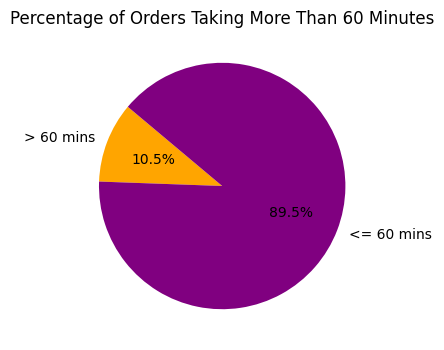

In [52]:
# Bar chart to represent the percentage
labels = ['> 60 mins', '<= 60 mins']
values = [percent_orders, 100 - percent_orders]

plt.figure(figsize=(4, 4))
plt.pie(values, labels=labels, colors=['Orange', 'Purple'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Orders Taking More Than 60 Minutes')
plt.show()

#### Observations:

*   Around **10.54%** of all orders taking more than 60 minutes to get deliver from the time the order is placed.




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [53]:
# Calculate mean delivery time on Weekend
weekend_mean_time = df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()
print('The mean delivery time for Weekend is around', round(weekend_mean_time, 2), 'minutes')

# Caclulate mean delivery time on Weekday
weekday_mean_time = df[df['day_of_the_week']=='Weekday']['delivery_time'].mean()
print('The mean delivery time for Weekday is around', round(weekday_mean_time, 2), 'minutes')

The mean delivery time for Weekend is around 22.47 minutes
The mean delivery time for Weekday is around 28.34 minutes


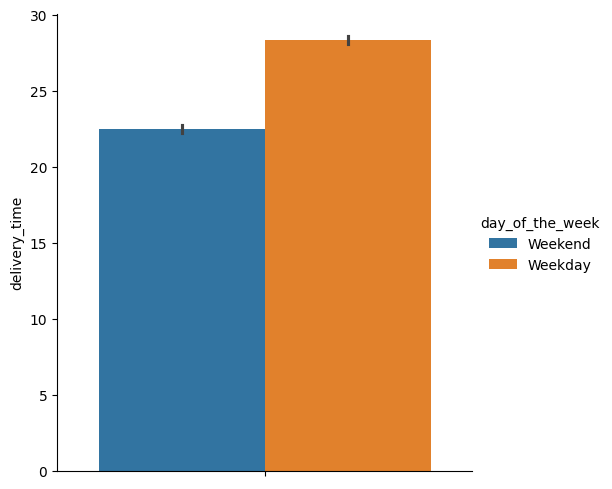

In [54]:
# Visaulize the delivery time using bar
sns.catplot(df, y='delivery_time', hue='day_of_the_week', kind='bar');

#### Observations:


*   The mean delivery time for Weekend is around 22.47 minutes
*   The mean delivery time for Weekday is around 28.34 minutes
*   The weekend deliveries being faster by approximately 5.87 minutes.






### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

*   Approximately 71% of orders are placed on weekends, indicating a higher demand during Weekends.
*   Around 82% of overall orders are of popular cuisine types. American cuisine is the most popular, followed by Japanese, Italian, and Chinese.
*   Korean, Vietnamese and Spanish are least popular, but quick to prepare
*   The mean delivery time is 24.16 mins. Weekdays generally have longer and more consistent delivery times compared to weekends.
*   Weekends shows lesser delivery time compare to weekdays implied weekend deliveries are faster but have variable & wider time range
*   Cost of the order varies from 4 to 35 dollars with average cost of 16.50, more than 50% orders are below 15 dollar.
*   75% orders are below 23 dollars, i.e. people prefer the price range till 20-22 dollars
*   Based on cost of orders. Korean and Vietnamese cuisines are more affordable. French & thai are more expensive, where as cuisines like Chinese and Southern indicates a broad spectrum of dish options at different price points, catering to a diverse customer base.
*  The average food preparation time is around 27 minutes. Most of the popular cuisine types takes nearby time for preparation
*   The distribution shows peaks at certain intervals, indicating certain cuisine types take longer to prepare.
*   Around 40% orders are not rated, from remaining 50% are rated good 5,4 ratings.
*  Orders with higher ratings tend to be slighly higher in cost, suggesting a bit positive correlation between cost and customer satisfaction.
*  There is no strong relationship between the cost of orders, food preparation time, and delivery time.
*  Around 10% of orders took more than 60 minutes of total time get delivery





### Recommendations:

*  Since a significant portion of orders occurs on weekends, introduce special promotions, deals, or loyalty programs that encourage customers to order more during these peak times.
*  As American food dominates the orders, along with Japenese, Italian etc.
Use targeted promotions to further boost the popularity of these cuisines.
*  Invest in promoting less popular cuisine types like korean, vietnamese which are having lower preparation times and costs. Which will catch more customers who are looking for quick and pocket friendly meals.
*  Collect more feedback from customer for less popular cuisine types to identify and address areas of improvement
*  Also consider promote Mexican, Indian, Middle Easterm cuisine type as it shows potential to get popular. It shows similar cost range  as well as food prepation time like top favourite cuisine types.
*  Collaborate with top rated restaurants to create exclusive limited time delas to catch more customers.
*  To cater to broader audience, consider offering more budget friendly option under $15
*  Focus on optimizing delivery times on Weekdays where delivery times seems to be longer. It might help in faster service and achieve customer satisfaction.
*  Weekdend delivery is faster compare to weekday but shows more varible time range for which Focusing on longer delivered items on weekends and optimizing those would lead better service and Customer satisfaction.
*  As there is high demand on weekend, prepare for increased demands by scaling up operations. This could involve better route planning, increasing the number of delivery personnel during peak hours, or partnering with additional delivery services.
*  Try collecting more data on order took more 60 min time to optimize the time taken.
*  Around 40% orders have not rated, encourage people to rate orders with rewards/benefits and better rating systems.
*  Given the positive correlation between cost and customer satisfaction, for such cost cuisine types try to expand the menus also focus on maintaining quality to justify the price and higher ratings. This could attract more customer who are willing to pay more for quality.
*  As majority of rated orders are rated 4 & 5, try maintaining the quality.

---

In [55]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/AIMLCourse/Python_Foundations/Project_1/Learner_Notebook_Full_Code_Shraddha.ipynb' --output-dir '/content/drive/MyDrive/Colab Notebooks/AIMLCourse/Python_Foundations/Project_1'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/AIMLCourse/Python_Foundations/Project_1/Learner_Notebook_Full_Code_Shraddha.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 560, in convert_single_notebook
    output, resources = self.export_si